<a href="https://colab.research.google.com/github/vikrantpotnis123/DS/blob/master/TED_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__


'1.0.4'

In [ ]:
ted = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv")

In [ ]:
ted.shape

(2550, 17)

In [ ]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [ ]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [ ]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
ted.shape

(2550, 17)

In [ ]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [ ]:
# check for missing values
ted.isna().sum() # missing values in rows

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## Which talks provoke most online discussion?

---



In [ ]:
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


## How long it has been online?

In [ ]:
ted['comments_per_view'] = ted.comments /ted.views

In [ ]:
ted.sort_values('comments_per_view').tail()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


## Change to views per comments to make it more readable?


In [ ]:
ted['views_per_comment'] = ted.views /ted.comments

In [ ]:
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764,0.001236,809.114852
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883,0.000136,7365.618005
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437,0.000977,1023.074195
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291


## Visualize the distribution of comments

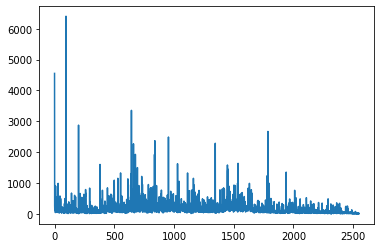

In [ ]:
ted.comments.plot()

X is the index
and Y is the values

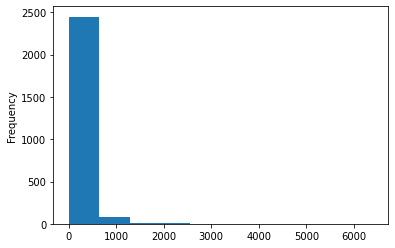

In [ ]:
ted.comments.plot(kind='hist')

## What does the distribution look like within 0-600 talks?

In [ ]:
ted[ted['comments'] >= 1000].shape

(32, 19)

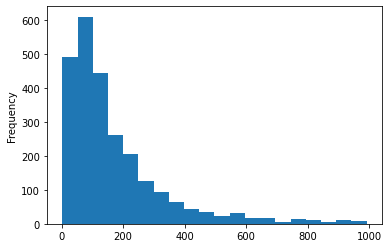

In [ ]:
ted[ted['comments'] < 1000]['comments'].plot(kind='hist', bins=20)


## Try box plot?



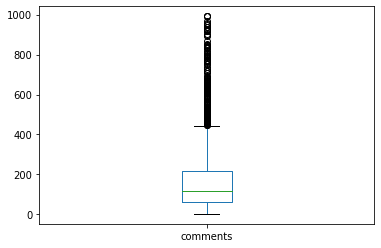

In [ ]:
ted[ted['comments'] < 1000]['comments'].plot(kind='box')

Histograms are good for destributions.

Bar plots are good for categories.

Line plots are good for time series data.

Scatter plots are for comparing multiple numeric variables.



## Plot the number of talks that took place each year.

In [ ]:
ted.event.sample(10)

1939            TED2015
1018    TEDxBoston 2011
2388      TEDWomen 2016
2434        TEDMED 2016
453             TED2009
210             TED2008
2503            TED2017
2549            TED2017
308             TED2008
1129    TEDxBloomington
Name: event, dtype: object

In [ ]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [ ]:
pd.to_datetime(ted.film_date)

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [ ]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comment'],
      dtype='object')

In [ ]:
pd.to_datetime(ted.film_date, unit='s')

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [ ]:
ted['film_date_time'] = pd.to_datetime(ted.film_date, unit='s')

In [ ]:
ted[['event', 'film_date_time']].sample(50) 

,event,film_date_time
1110,TEDxWomen 2011,2011-12-01
2235,TED2016,2016-02-16
755,TEDGlobal 2010,2010-07-16
1147,TEDxRC2,2011-11-27
2131,TEDMED 2015,2015-11-18
928,TED2011,2011-03-02
838,TEDSalon NY2011,2010-11-18
279,EG 2007,2007-12-12
439,TED2009,2009-02-05
1797,TEDxClaremontColleges,2014-02-12


In [ ]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_date_time        datetime64[ns]
dtype: object

# How many talks per year?
Bar plot is excluding years that have no data ![alt text](https://)

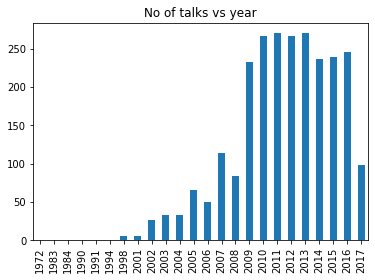

In [ ]:
ted.film_date_time.dt.year.value_counts().sort_index().plot(kind='bar', title='No of talks vs year')


Let's try line plot!

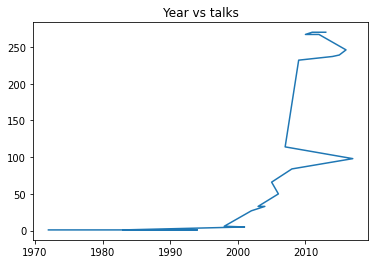

In [ ]:
ted.film_date_time.dt.year.value_counts().plot(kind='line',title='Year vs talks')

Notice that the above data is unsorted so it's plotted in the order of occurence year

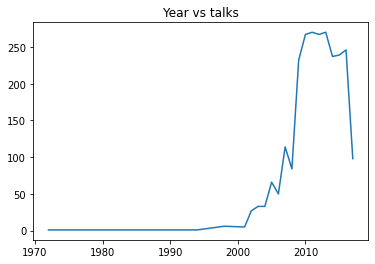

In [ ]:
ted.film_date_time.dt.year.value_counts().sort_index().plot(kind='line',title='Year vs talks')

Now it looks great

## What were the best events in TED history to attend?

In [ ]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comment',
       'film_date_time'],
      dtype='object')

In [ ]:
ted.event.sample(100)

2332              TEDxNewYork
1548           TEDGlobal 2013
2428                   TEDNYC
842             TEDWomen 2010
2455                  TED2017
                ...          
2275                  TED2016
2436    TEDLagos Ideas Search
1789                  TED2014
682                   TED2010
2494                  TED2017
Name: event, Length: 100, dtype: object

In [ ]:
ted.event.value_counts

<bound method IndexOpsMixin.value_counts of 0            TED2006
1            TED2006
2            TED2006
3            TED2006
4            TED2006
            ...     
2545         TED2017
2546         TED2017
2547         TED2017
2548    TEDxMileHigh
2549         TED2017
Name: event, Length: 2550, dtype: object>

In [ ]:
ted.event.unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 

In [ ]:
ted[['event', 'ratings', 'views']].dtypes

event      object
ratings    object
views       int64
dtype: object

In [ ]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [ ]:
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [ ]:
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


TEDxPugetSound has the highest mean no of views but the count is 1, which is not a good representative!

In [ ]:
ted.groupby('event').views.agg(['count', 'mean']).sort_values('count').tail()

,count,mean
event,,
TED2015,75,2.011017e+06
TED2016,77,1.812622e+06
TED2013,77,2.302700e+06
TED2009,83,1.754896e+06
TED2014,84,2.072874e+06


In [ ]:
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


TED2012 has the highest sum of events, where sum = mean * count 

## Next exercise unpack the ratings data

In [ ]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

It's tagged!

In [ ]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [ ]:
ted.ratings.dtypes

dtype('O')

In [ ]:
import ast

In [ ]:
ast.literal_eval('[1, 2, 3]')

[1, 2, 3]

In [ ]:
ast.literal_eval(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [ ]:
ted['ratings_list'] = ted.ratings.apply(ast.literal_eval)

In [ ]:
ted['ratings_list'][0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [ ]:
def get_total_count_ratings(list_of_ratings):
  num = 0
  for l in list_of_ratings:
    num += l['count']
  return num

In [ ]:
get_total_count_ratings(ted['ratings_list'][0])

93850

In [ ]:
get_total_count_ratings(ted['ratings_list'][1])

2936

In [ ]:
ted['num_ratings'] = ted.ratings_list.apply(get_total_count_ratings)

In [ ]:
ted['num_ratings'].max()

93850

In [ ]:
pd.DataFrame(ted.ratings_list[0])['count'].sum()

93850

In [ ]:
ted['num_ratings2'] = ted.ratings_list.apply()

## Count the number of funny ratings

In [ ]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

## Which occupations deliver the funniest TED talks on average?